In [37]:
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
import numpy as np

from matplotlib.image import imread
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# read in data

# training data
path_X = "data/train/X.csv"
data_set = pd.read_csv(path_X,header=0)
X_train = data_set.loc[:,'ORIG_RT':'X12' ]
X_train = pd.DataFrame.as_matrix(X_train)

path_Y = "data/train/Y.csv"
data_set = pd.read_csv(path_Y,header=0)
data_set = data_set.loc[:,'0':'5' ]
Y_train = pd.DataFrame.as_matrix(data_set)
#Y_train = np.argmax(Y_train, axis=1)
#Y_train = np.reshape(Y_train, [Y_train.shape[0], 1])

# test data
path_X = "data/test/X.csv"
data_set = pd.read_csv(path_X,header=0)
X_test = data_set.loc[:,'ORIG_RT':'X12' ]
X_test = pd.DataFrame.as_matrix(X_test)

path_Y = "data/test/Y.csv"
data_set = pd.read_csv(path_Y,header=0)
data_set = data_set.loc[:,'0':'5' ]
Y_test = pd.DataFrame.as_matrix(data_set)
#y_test = Y_test
#Y_test = np.argmax(Y_test, axis=1)
#Y_test = np.reshape(Y_test, [Y_test.shape[0], 1])



c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [22]:
idx_1 = np.where(np.equal(np.argmax(Y_train, axis=1), 1))
i_1 = np.take(X_train, idx_1, axis = 0)
i_1 = np.squeeze(i_1, axis = 0)
Y_1 = np.take(Y_train, idx_1, axis = 0)
Y_1 = np.squeeze(Y_1, axis = 0)

idx_0 = np.where(np.equal(np.argmax(Y_train, axis=1), 0))
i_0 = np.take(X_train, idx_0, axis = 0)
i_0 = np.squeeze(i_0, axis = 0)
np.take(i_0,np.random.permutation(i_0.shape[0]),axis=0,out=i_0)
n = i_1.shape[0]
i_0_reduced = i_0[0:n, :]
Y_0 = np.take(Y_train, idx_0, axis = 0)
Y_0 = np.squeeze(Y_0, axis = 0)
Y_0_reduced = Y_0[0:n,:]

idx_2 = np.where(np.equal(np.argmax(Y_train, axis=1), 2))
i_2 = np.take(X_train, idx_2, axis = 0)
i_2 = np.squeeze(i_2, axis = 0)
Y_2 = np.take(Y_train, idx_2, axis = 0)
Y_2 = np.squeeze(Y_2, axis = 0)
i_2 = np.tile(i_2, (2,1))
Y_2 = np.tile(Y_2, (2,1))
i_2 = i_2[0:n, :]
Y_2 = Y_2[0:n, :]

idx_3 = np.where(np.equal(np.argmax(Y_train, axis=1), 3))
i_3 = np.take(X_train, idx_3, axis = 0)
i_3 = np.squeeze(i_3, axis = 0)
Y_3 = np.take(Y_train, idx_3, axis = 0)
Y_3 = np.squeeze(Y_3, axis = 0)
i_3 = np.tile(i_3, (3,1))
Y_3 = np.tile(Y_3, (3,1))
i_3 = i_3[0:n, :]
Y_3 = Y_3[0:n, :]

idx_4 = np.where(np.equal(np.argmax(Y_train, axis=1), 4))
i_4 = np.take(X_train, idx_4, axis = 0)
i_4 = np.squeeze(i_4, axis = 0)
Y_4 = np.take(Y_train, idx_4, axis = 0)
Y_4 = np.squeeze(Y_4, axis = 0)
i_4 = np.tile(i_4, (4,1))
Y_4 = np.tile(Y_4, (4,1))
i_4 = i_4[0:n, :]
Y_4 = Y_4[0:n, :]

idx_5 = np.where(np.equal(np.argmax(Y_train, axis=1), 5))
i_5 = np.take(X_train, idx_5, axis = 0)
i_5 = np.squeeze(i_5, axis = 0)
Y_5 = np.take(Y_train, idx_5, axis = 0)
Y_5 = np.squeeze(Y_5, axis = 0)
i_5 = np.tile(i_5, (4,1))
Y_5 = np.tile(Y_5, (4,1))
i_5 = i_5[0:n, :]
Y_5 = Y_5[0:n, :]

x_train = np.concatenate([i_0_reduced, i_1, i_2, i_3, i_4, i_5], axis = 0)
y_train = np.concatenate([Y_0_reduced, Y_1, Y_2, Y_3, Y_4, Y_5], axis = 0)

In [23]:
train = RandomForestClassifier(n_estimators=500, min_samples_leaf = 5).fit(x_train, y_train)

In [25]:
pred_train = train.predict(x_train)

In [26]:
pred_test = train.predict(X_test)

(479861, 6)

In [27]:
# metrics for trained data

class_0_TP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==0, np.argmax(y_train, axis=1)==0))
class_0_FP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==0, np.argmax(y_train, axis=1)!=0))
class_0_TN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=0, np.argmax(y_train, axis=1)!=0))
class_0_FN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=0, np.argmax(y_train, axis=1)==0))

class_1_TP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==1, np.argmax(y_train, axis=1)==1))
class_1_FP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==1, np.argmax(y_train, axis=1)!=1))
class_1_TN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=1, np.argmax(y_train, axis=1)!=1))
class_1_FN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=1, np.argmax(y_train, axis=1)==1))

class_2_TP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==2, np.argmax(y_train, axis=1)==2))
class_2_FP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==2, np.argmax(y_train, axis=1)!=2))
class_2_TN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=2, np.argmax(y_train, axis=1)!=2))
class_2_FN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=2, np.argmax(y_train, axis=1)==2))

class_3_TP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==3, np.argmax(y_train, axis=1)==3))
class_3_FP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==3, np.argmax(y_train, axis=1)!=3))
class_3_TN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=3, np.argmax(y_train, axis=1)!=3))
class_3_FN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=3, np.argmax(y_train, axis=1)==3))

class_4_TP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==4, np.argmax(y_train, axis=1)==4))
class_4_FP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==4, np.argmax(y_train, axis=1)!=4))
class_4_TN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=4, np.argmax(y_train, axis=1)!=4))
class_4_FN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=4, np.argmax(y_train, axis=1)==4))

class_5_TP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==5, np.argmax(y_train, axis=1)==5))
class_5_FP = np.sum(np.logical_and(np.argmax(pred_train, axis=1)==5, np.argmax(y_train, axis=1)!=5))
class_5_TN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=5, np.argmax(y_train, axis=1)!=5))
class_5_FN = np.sum(np.logical_and(np.argmax(pred_train, axis=1)!=5, np.argmax(y_train, axis=1)==5))


In [28]:
# metrics for trained data
print(class_0_TP)
print(class_0_FP)
print(class_0_TN)
print(class_0_FN)
print(class_1_TP)
print(class_1_FP)
print(class_1_TN)
print(class_1_FN)
print(class_2_TP)
print(class_2_FP)
print(class_2_TN)
print(class_2_FN)
print(class_3_TP)
print(class_3_FP)
print(class_3_TN)
print(class_3_FN)
print(class_4_TP)
print(class_4_FP)
print(class_4_TN)
print(class_4_FN)
print(class_5_TP)
print(class_5_FP)
print(class_5_TN)
print(class_5_FN)

129061
425514
219816
5
308
0
645330
128758
16121
1
645329
112945
56723
2
645328
72343
62514
1
645329
66552
83400
751
644579
45666


In [29]:
# metrics for test data

class_0_TP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==0, np.argmax(Y_test, axis=1)==0))
class_0_FP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==0, np.argmax(Y_test, axis=1)!=0))
class_0_TN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=0, np.argmax(Y_test, axis=1)!=0))
class_0_FN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=0, np.argmax(Y_test, axis=1)==0))

class_1_TP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==1, np.argmax(Y_test, axis=1)==1))
class_1_FP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==1, np.argmax(Y_test, axis=1)!=1))
class_1_TN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=1, np.argmax(Y_test, axis=1)!=1))
class_1_FN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=1, np.argmax(Y_test, axis=1)==1))

class_2_TP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==2, np.argmax(Y_test, axis=1)==2))
class_2_FP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==2, np.argmax(Y_test, axis=1)!=2))
class_2_TN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=2, np.argmax(Y_test, axis=1)!=2))
class_2_FN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=2, np.argmax(Y_test, axis=1)==2))

class_3_TP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==3, np.argmax(Y_test, axis=1)==3))
class_3_FP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==3, np.argmax(Y_test, axis=1)!=3))
class_3_TN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=3, np.argmax(Y_test, axis=1)!=3))
class_3_FN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=3, np.argmax(Y_test, axis=1)==3))

class_4_TP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==4, np.argmax(Y_test, axis=1)==4))
class_4_FP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==4, np.argmax(Y_test, axis=1)!=4))
class_4_TN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=4, np.argmax(Y_test, axis=1)!=4))
class_4_FN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=4, np.argmax(Y_test, axis=1)==4))

class_5_TP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==5, np.argmax(Y_test, axis=1)==5))
class_5_FP = np.sum(np.logical_and(np.argmax(pred_test, axis=1)==5, np.argmax(Y_test, axis=1)!=5))
class_5_TN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=5, np.argmax(Y_test, axis=1)!=5))
class_5_FN = np.sum(np.logical_and(np.argmax(pred_test, axis=1)!=5, np.argmax(Y_test, axis=1)==5))

In [30]:
# metrics for test data
print(class_0_TP)
print(class_0_FP)
print(class_0_TN)
print(class_0_FN)
print(class_1_TP)
print(class_1_FP)
print(class_1_TN)
print(class_1_FN)
print(class_2_TP)
print(class_2_FP)
print(class_2_TN)
print(class_2_FN)
print(class_3_TP)
print(class_3_FP)
print(class_3_TN)
print(class_3_FN)
print(class_4_TP)
print(class_4_FP)
print(class_4_TN)
print(class_4_FN)
print(class_5_TP)
print(class_5_FP)
print(class_5_TN)
print(class_5_FN)

248301
18322
1285
40
2
0
260721
7225
61
19
262308
5560
145
8
265487
2308
191
20
265635
2102
718
161
265774
1295


In [31]:
#ROC curves
# convert predictions into one-hot-vectors
#targets = pred.reshape(-1)
#y_pred = np.eye(6)[targets]
num_clusters = 6

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_clusters):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_clusters)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_clusters):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_clusters

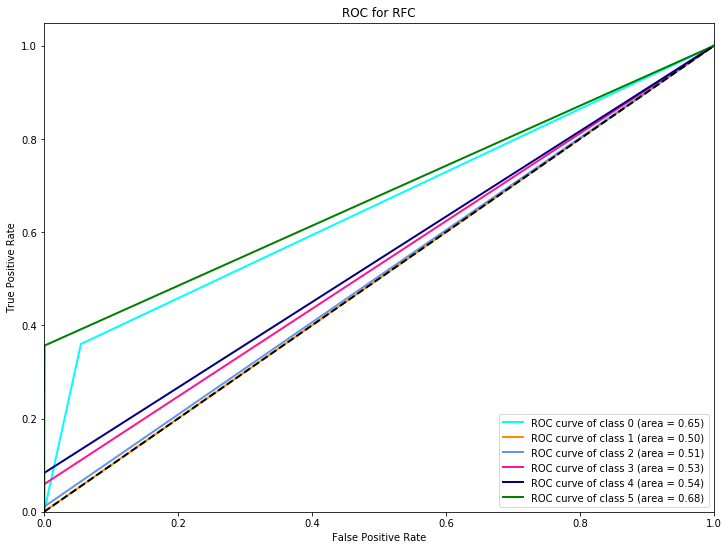

In [32]:
# Plot all ROC curves
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy', 'green'])
for i, color in zip(range(num_clusters), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for RFC')
plt.legend(loc="lower right")
plt.show()

In [35]:
# dev data
path_X = "data/dev/X.csv"
data_set = pd.read_csv(path_X,header=0)
X_dev = data_set.loc[:,'ORIG_RT':'X12' ]
X_dev = pd.DataFrame.as_matrix(X_dev)

path_Y = "data/dev/Y.csv"
data_set = pd.read_csv(path_Y,header=0)
data_set = data_set.loc[:,'0':'5' ]
Y_dev = pd.DataFrame.as_matrix(data_set)

c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
